In [46]:
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import numpy as np
from gensim.models import Word2Vec
import spacy
import re
import multiprocessing
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
import random
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [25]:
nlp = spacy.load('en', disable=['ner', 'parser'])

In [26]:
rep_text = pickle.load(open('../../data/all_tweet_texts_rep.p', 'rb'))

In [27]:
rep_text_tokenized = [tokenizer.tokenize(line) for line in rep_texts]

In [56]:
len(rep_text)

87901

In [29]:
cores = multiprocessing.cpu_count()

In [88]:
def build_train_word2vec(list_of_token, list_of_str):
    model = Word2Vec(min_count=3, window=10, size=300)
    model.build_vocab(list_of_token, progress_per=10000)
    model.train(list_of_str, total_examples=model.corpus_count, epochs=50, report_delay=1)
    return model

In [89]:
rep_model = build_train_word2vec(rep_text_tokenized, rep_text)

INFO - 16:03:26: collecting all words and their counts
INFO - 16:03:26: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 16:03:26: PROGRESS: at sentence #10000, processed 276551 words, keeping 21453 word types
INFO - 16:03:26: PROGRESS: at sentence #20000, processed 575441 words, keeping 31938 word types
INFO - 16:03:26: PROGRESS: at sentence #30000, processed 869026 words, keeping 40276 word types
INFO - 16:03:26: PROGRESS: at sentence #40000, processed 1171472 words, keeping 45028 word types
INFO - 16:03:26: PROGRESS: at sentence #50000, processed 1480372 words, keeping 50862 word types
INFO - 16:03:26: PROGRESS: at sentence #60000, processed 1745555 words, keeping 54615 word types
INFO - 16:03:26: PROGRESS: at sentence #70000, processed 2029611 words, keeping 58016 word types
INFO - 16:03:26: PROGRESS: at sentence #80000, processed 2289268 words, keeping 61386 word types
INFO - 16:03:26: collected 69171 word types from a corpus of 2484945 raw words and 87901 

INFO - 16:04:23: EPOCH 5 - PROGRESS: at 31.92% examples, 825733 words/s, in_qsize 5, out_qsize 0
INFO - 16:04:24: EPOCH 5 - PROGRESS: at 39.77% examples, 827561 words/s, in_qsize 5, out_qsize 0
INFO - 16:04:25: EPOCH 5 - PROGRESS: at 47.60% examples, 829518 words/s, in_qsize 5, out_qsize 0
INFO - 16:04:26: EPOCH 5 - PROGRESS: at 54.87% examples, 829751 words/s, in_qsize 5, out_qsize 0
INFO - 16:04:27: EPOCH 5 - PROGRESS: at 63.16% examples, 830712 words/s, in_qsize 5, out_qsize 0
INFO - 16:04:28: EPOCH 5 - PROGRESS: at 72.01% examples, 831096 words/s, in_qsize 5, out_qsize 0
INFO - 16:04:29: EPOCH 5 - PROGRESS: at 79.84% examples, 828841 words/s, in_qsize 5, out_qsize 0
INFO - 16:04:30: EPOCH 5 - PROGRESS: at 89.11% examples, 829807 words/s, in_qsize 5, out_qsize 0
INFO - 16:04:31: EPOCH 5 - PROGRESS: at 98.33% examples, 830446 words/s, in_qsize 5, out_qsize 0
INFO - 16:04:31: worker thread finished; awaiting finish of 2 more threads
INFO - 16:04:31: worker thread finished; awaiting fi

INFO - 16:05:33: EPOCH 10 - PROGRESS: at 86.09% examples, 805190 words/s, in_qsize 5, out_qsize 0
INFO - 16:05:34: EPOCH 10 - PROGRESS: at 95.56% examples, 808545 words/s, in_qsize 5, out_qsize 0
INFO - 16:05:34: worker thread finished; awaiting finish of 2 more threads
INFO - 16:05:34: worker thread finished; awaiting finish of 1 more threads
INFO - 16:05:34: worker thread finished; awaiting finish of 0 more threads
INFO - 16:05:34: EPOCH - 10 : training on 13324213 raw words (10148700 effective words) took 12.5s, 809514 effective words/s
INFO - 16:05:35: EPOCH 11 - PROGRESS: at 8.26% examples, 837663 words/s, in_qsize 5, out_qsize 0
INFO - 16:05:36: EPOCH 11 - PROGRESS: at 16.58% examples, 829245 words/s, in_qsize 5, out_qsize 0
INFO - 16:05:37: EPOCH 11 - PROGRESS: at 24.09% examples, 831474 words/s, in_qsize 5, out_qsize 0
INFO - 16:05:38: EPOCH 11 - PROGRESS: at 32.17% examples, 832110 words/s, in_qsize 5, out_qsize 0
INFO - 16:05:39: EPOCH 11 - PROGRESS: at 39.89% examples, 83258

INFO - 16:06:38: EPOCH 16 - PROGRESS: at 16.74% examples, 838177 words/s, in_qsize 5, out_qsize 0
INFO - 16:06:39: EPOCH 16 - PROGRESS: at 24.27% examples, 839879 words/s, in_qsize 5, out_qsize 0
INFO - 16:06:40: EPOCH 16 - PROGRESS: at 32.41% examples, 838105 words/s, in_qsize 5, out_qsize 0
INFO - 16:06:41: EPOCH 16 - PROGRESS: at 39.71% examples, 827237 words/s, in_qsize 5, out_qsize 0
INFO - 16:06:42: EPOCH 16 - PROGRESS: at 47.60% examples, 830495 words/s, in_qsize 5, out_qsize 0
INFO - 16:06:43: EPOCH 16 - PROGRESS: at 54.70% examples, 827051 words/s, in_qsize 5, out_qsize 0
INFO - 16:06:44: EPOCH 16 - PROGRESS: at 62.97% examples, 828448 words/s, in_qsize 5, out_qsize 0
INFO - 16:06:45: EPOCH 16 - PROGRESS: at 71.88% examples, 830511 words/s, in_qsize 5, out_qsize 0
INFO - 16:06:46: EPOCH 16 - PROGRESS: at 79.98% examples, 831015 words/s, in_qsize 5, out_qsize 0
INFO - 16:06:47: EPOCH 16 - PROGRESS: at 89.28% examples, 831732 words/s, in_qsize 5, out_qsize 0
INFO - 16:06:48: EPO

INFO - 16:07:46: EPOCH 21 - PROGRESS: at 72.76% examples, 839185 words/s, in_qsize 5, out_qsize 0
INFO - 16:07:47: EPOCH 21 - PROGRESS: at 81.02% examples, 840114 words/s, in_qsize 5, out_qsize 0
INFO - 16:07:48: EPOCH 21 - PROGRESS: at 90.54% examples, 840522 words/s, in_qsize 5, out_qsize 0
INFO - 16:07:49: EPOCH 21 - PROGRESS: at 99.81% examples, 840009 words/s, in_qsize 2, out_qsize 1
INFO - 16:07:49: worker thread finished; awaiting finish of 2 more threads
INFO - 16:07:49: worker thread finished; awaiting finish of 1 more threads
INFO - 16:07:49: worker thread finished; awaiting finish of 0 more threads
INFO - 16:07:49: EPOCH - 21 : training on 13324213 raw words (10149155 effective words) took 12.1s, 839823 effective words/s
INFO - 16:07:50: EPOCH 22 - PROGRESS: at 8.26% examples, 842388 words/s, in_qsize 5, out_qsize 0
INFO - 16:07:51: EPOCH 22 - PROGRESS: at 16.89% examples, 847675 words/s, in_qsize 5, out_qsize 0
INFO - 16:07:52: EPOCH 22 - PROGRESS: at 24.49% examples, 84554

INFO - 16:08:52: EPOCH - 26 : training on 13324213 raw words (10149279 effective words) took 13.9s, 730852 effective words/s
INFO - 16:08:53: EPOCH 27 - PROGRESS: at 6.26% examples, 622359 words/s, in_qsize 5, out_qsize 0
INFO - 16:08:54: EPOCH 27 - PROGRESS: at 13.39% examples, 676313 words/s, in_qsize 5, out_qsize 0
INFO - 16:08:55: EPOCH 27 - PROGRESS: at 18.62% examples, 632465 words/s, in_qsize 5, out_qsize 0
INFO - 16:08:56: EPOCH 27 - PROGRESS: at 24.81% examples, 647864 words/s, in_qsize 5, out_qsize 0
INFO - 16:08:57: EPOCH 27 - PROGRESS: at 31.52% examples, 655720 words/s, in_qsize 5, out_qsize 0
INFO - 16:08:58: EPOCH 27 - PROGRESS: at 38.64% examples, 670827 words/s, in_qsize 5, out_qsize 0
INFO - 16:08:59: EPOCH 27 - PROGRESS: at 45.28% examples, 676573 words/s, in_qsize 5, out_qsize 0
INFO - 16:09:00: EPOCH 27 - PROGRESS: at 49.04% examples, 643169 words/s, in_qsize 5, out_qsize 0
INFO - 16:09:01: EPOCH 27 - PROGRESS: at 54.10% examples, 633393 words/s, in_qsize 5, out_qs

INFO - 16:10:01: EPOCH - 31 : training on 13324213 raw words (10149039 effective words) took 13.6s, 743972 effective words/s
INFO - 16:10:02: EPOCH 32 - PROGRESS: at 3.51% examples, 357931 words/s, in_qsize 5, out_qsize 0
INFO - 16:10:03: EPOCH 32 - PROGRESS: at 10.93% examples, 532657 words/s, in_qsize 5, out_qsize 0
INFO - 16:10:04: EPOCH 32 - PROGRESS: at 18.30% examples, 613539 words/s, in_qsize 5, out_qsize 0
INFO - 16:10:05: EPOCH 32 - PROGRESS: at 26.10% examples, 672353 words/s, in_qsize 5, out_qsize 0
INFO - 16:10:06: EPOCH 32 - PROGRESS: at 34.44% examples, 711007 words/s, in_qsize 5, out_qsize 0
INFO - 16:10:07: EPOCH 32 - PROGRESS: at 42.52% examples, 736999 words/s, in_qsize 5, out_qsize 0
INFO - 16:10:08: EPOCH 32 - PROGRESS: at 49.88% examples, 748074 words/s, in_qsize 5, out_qsize 0
INFO - 16:10:09: EPOCH 32 - PROGRESS: at 57.56% examples, 761136 words/s, in_qsize 5, out_qsize 0
INFO - 16:10:10: EPOCH 32 - PROGRESS: at 65.38% examples, 760156 words/s, in_qsize 5, out_qs

INFO - 16:11:14: EPOCH 36 - PROGRESS: at 76.64% examples, 563817 words/s, in_qsize 5, out_qsize 0
INFO - 16:11:15: EPOCH 36 - PROGRESS: at 81.66% examples, 557670 words/s, in_qsize 5, out_qsize 0
INFO - 16:11:16: EPOCH 36 - PROGRESS: at 85.71% examples, 544807 words/s, in_qsize 5, out_qsize 0
INFO - 16:11:17: EPOCH 36 - PROGRESS: at 92.09% examples, 546442 words/s, in_qsize 5, out_qsize 0
INFO - 16:11:18: worker thread finished; awaiting finish of 2 more threads
INFO - 16:11:18: worker thread finished; awaiting finish of 1 more threads
INFO - 16:11:18: worker thread finished; awaiting finish of 0 more threads
INFO - 16:11:18: EPOCH - 36 : training on 13324213 raw words (10148660 effective words) took 18.3s, 555795 effective words/s
INFO - 16:11:19: EPOCH 37 - PROGRESS: at 6.19% examples, 604398 words/s, in_qsize 5, out_qsize 0
INFO - 16:11:20: EPOCH 37 - PROGRESS: at 13.27% examples, 662662 words/s, in_qsize 5, out_qsize 0
INFO - 16:11:21: EPOCH 37 - PROGRESS: at 19.66% examples, 66620

INFO - 16:12:24: EPOCH 41 - PROGRESS: at 92.82% examples, 726273 words/s, in_qsize 5, out_qsize 0
INFO - 16:12:24: worker thread finished; awaiting finish of 2 more threads
INFO - 16:12:24: worker thread finished; awaiting finish of 1 more threads
INFO - 16:12:24: worker thread finished; awaiting finish of 0 more threads
INFO - 16:12:24: EPOCH - 41 : training on 13324213 raw words (10149303 effective words) took 13.9s, 731646 effective words/s
INFO - 16:12:25: EPOCH 42 - PROGRESS: at 6.38% examples, 633420 words/s, in_qsize 5, out_qsize 0
INFO - 16:12:26: EPOCH 42 - PROGRESS: at 12.22% examples, 610354 words/s, in_qsize 5, out_qsize 0
INFO - 16:12:27: EPOCH 42 - PROGRESS: at 19.37% examples, 659697 words/s, in_qsize 5, out_qsize 0
INFO - 16:12:28: EPOCH 42 - PROGRESS: at 25.02% examples, 652429 words/s, in_qsize 5, out_qsize 0
INFO - 16:12:29: EPOCH 42 - PROGRESS: at 30.60% examples, 629490 words/s, in_qsize 5, out_qsize 0
INFO - 16:12:30: EPOCH 42 - PROGRESS: at 35.12% examples, 60209

INFO - 16:13:31: worker thread finished; awaiting finish of 0 more threads
INFO - 16:13:31: EPOCH - 46 : training on 13324213 raw words (10149597 effective words) took 12.0s, 849129 effective words/s
INFO - 16:13:32: EPOCH 47 - PROGRESS: at 8.26% examples, 843404 words/s, in_qsize 5, out_qsize 0
INFO - 16:13:33: EPOCH 47 - PROGRESS: at 16.79% examples, 837735 words/s, in_qsize 5, out_qsize 0
INFO - 16:13:35: EPOCH 47 - PROGRESS: at 24.54% examples, 847803 words/s, in_qsize 5, out_qsize 0
INFO - 16:13:36: EPOCH 47 - PROGRESS: at 32.86% examples, 846905 words/s, in_qsize 5, out_qsize 0
INFO - 16:13:37: EPOCH 47 - PROGRESS: at 40.77% examples, 847767 words/s, in_qsize 5, out_qsize 0
INFO - 16:13:38: EPOCH 47 - PROGRESS: at 48.59% examples, 850009 words/s, in_qsize 5, out_qsize 0
INFO - 16:13:39: EPOCH 47 - PROGRESS: at 56.47% examples, 853097 words/s, in_qsize 5, out_qsize 0
INFO - 16:13:40: EPOCH 47 - PROGRESS: at 65.25% examples, 855426 words/s, in_qsize 5, out_qsize 0
INFO - 16:13:41: 

In [91]:
rep_model.wv.most_similar(positive=["covid"])

[('Tazewell', 0.23738251626491547),
 ('100s', 0.21132460236549377),
 ('groceries', 0.2090696096420288),
 ('@ARCWV', 0.19734081625938416),
 ('Requires', 0.19107070565223694),
 ('photograph', 0.19099336862564087),
 ('allegation', 0.1897074431180954),
 ('wreck', 0.18783409893512726),
 ('cl', 0.18692800402641296),
 ('@IADeptAg', 0.18654590845108032)]

In [69]:
def tsnescatterplot(model, word, list_names, title):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=50).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title(title, fontsize=15)

In [70]:
rep_vocab_words = list(rep_model.wv.vocab.keys())

In [71]:
rep_random_words = []
for i in range(10):
    rep_random_words.append(random.choice(rep_vocab_words))

In [81]:
rep_random_words

['Harmon',
 '#LearnAtHome',
 '#neleg',
 '#InItTogether',
 '🗞',
 'vidas',
 '@3M',
 'thrilling',
 'Obama-era',
 '⬇']

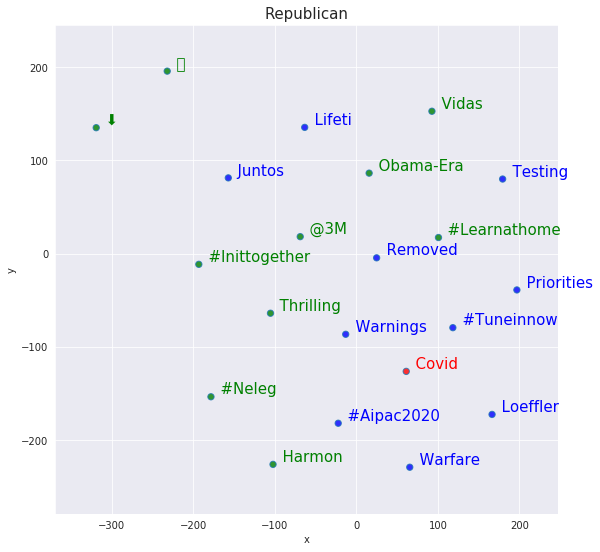

In [82]:
tsnescatterplot(rep_model, 'COVID', rep_random_words, 'Republican')

In [74]:
dem_text = pickle.load(open('../../data/all_tweet_texts_dem.p', 'rb'))

In [75]:
dem_text_tokenized = [tokenizer.tokenize(line) for line in dem_texts]

In [76]:
dem_model = build_train_word2vec(dem_text_tokenized, dem_text)

INFO - 15:31:50: collecting all words and their counts
INFO - 15:31:50: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 15:31:50: PROGRESS: at sentence #10000, processed 296830 words, keeping 20181 word types
INFO - 15:31:50: PROGRESS: at sentence #20000, processed 577723 words, keeping 29596 word types
INFO - 15:31:50: PROGRESS: at sentence #30000, processed 866997 words, keeping 38858 word types
INFO - 15:31:50: PROGRESS: at sentence #40000, processed 1149009 words, keeping 46010 word types
INFO - 15:31:50: PROGRESS: at sentence #50000, processed 1440323 words, keeping 50792 word types
INFO - 15:31:50: PROGRESS: at sentence #60000, processed 1729242 words, keeping 56064 word types
INFO - 15:31:50: PROGRESS: at sentence #70000, processed 2027400 words, keeping 60111 word types
INFO - 15:31:50: PROGRESS: at sentence #80000, processed 2311900 words, keeping 63957 word types
INFO - 15:31:50: PROGRESS: at sentence #90000, processed 2593020 words, keeping 67459 wor

INFO - 15:32:42: EPOCH 5 - PROGRESS: at 77.29% examples, 601885 words/s, in_qsize 5, out_qsize 1
INFO - 15:32:43: EPOCH 5 - PROGRESS: at 86.55% examples, 604081 words/s, in_qsize 5, out_qsize 0
INFO - 15:32:44: EPOCH 5 - PROGRESS: at 97.17% examples, 604526 words/s, in_qsize 5, out_qsize 0
INFO - 15:32:44: worker thread finished; awaiting finish of 2 more threads
INFO - 15:32:44: worker thread finished; awaiting finish of 1 more threads
INFO - 15:32:44: worker thread finished; awaiting finish of 0 more threads
INFO - 15:32:44: EPOCH - 5 : training on 21269419 raw words (6231824 effective words) took 10.3s, 604425 effective words/s
INFO - 15:32:45: EPOCH 6 - PROGRESS: at 9.65% examples, 589017 words/s, in_qsize 5, out_qsize 0
INFO - 15:32:46: EPOCH 6 - PROGRESS: at 19.54% examples, 595470 words/s, in_qsize 5, out_qsize 0
INFO - 15:32:47: EPOCH 6 - PROGRESS: at 28.29% examples, 580823 words/s, in_qsize 5, out_qsize 0
INFO - 15:32:48: EPOCH 6 - PROGRESS: at 37.19% examples, 577645 words/s

INFO - 15:33:47: worker thread finished; awaiting finish of 2 more threads
INFO - 15:33:47: worker thread finished; awaiting finish of 1 more threads
INFO - 15:33:47: worker thread finished; awaiting finish of 0 more threads
INFO - 15:33:47: EPOCH - 11 : training on 21269419 raw words (6226633 effective words) took 10.2s, 609911 effective words/s
INFO - 15:33:48: EPOCH 12 - PROGRESS: at 10.12% examples, 614184 words/s, in_qsize 5, out_qsize 0
INFO - 15:33:49: EPOCH 12 - PROGRESS: at 19.15% examples, 585610 words/s, in_qsize 5, out_qsize 0
INFO - 15:33:50: EPOCH 12 - PROGRESS: at 28.49% examples, 586649 words/s, in_qsize 5, out_qsize 0
INFO - 15:33:51: EPOCH 12 - PROGRESS: at 38.07% examples, 592712 words/s, in_qsize 5, out_qsize 0
INFO - 15:33:52: EPOCH 12 - PROGRESS: at 47.82% examples, 596571 words/s, in_qsize 5, out_qsize 0
INFO - 15:33:53: EPOCH 12 - PROGRESS: at 57.48% examples, 598400 words/s, in_qsize 5, out_qsize 0
INFO - 15:33:54: EPOCH 12 - PROGRESS: at 66.87% examples, 59573

INFO - 15:34:52: worker thread finished; awaiting finish of 0 more threads
INFO - 15:34:52: EPOCH - 17 : training on 21269419 raw words (6229031 effective words) took 12.1s, 515574 effective words/s
INFO - 15:34:53: EPOCH 18 - PROGRESS: at 8.84% examples, 553788 words/s, in_qsize 5, out_qsize 0
INFO - 15:34:54: EPOCH 18 - PROGRESS: at 19.08% examples, 580327 words/s, in_qsize 5, out_qsize 0
INFO - 15:34:55: EPOCH 18 - PROGRESS: at 28.69% examples, 588095 words/s, in_qsize 5, out_qsize 0
INFO - 15:34:56: EPOCH 18 - PROGRESS: at 34.78% examples, 539296 words/s, in_qsize 5, out_qsize 0
INFO - 15:34:57: EPOCH 18 - PROGRESS: at 41.75% examples, 517667 words/s, in_qsize 5, out_qsize 0
INFO - 15:34:58: EPOCH 18 - PROGRESS: at 48.17% examples, 499942 words/s, in_qsize 5, out_qsize 0
INFO - 15:34:59: EPOCH 18 - PROGRESS: at 55.77% examples, 497172 words/s, in_qsize 5, out_qsize 0
INFO - 15:35:00: EPOCH 18 - PROGRESS: at 62.74% examples, 487053 words/s, in_qsize 5, out_qsize 0
INFO - 15:35:01: E

INFO - 15:36:00: EPOCH 23 - PROGRESS: at 36.64% examples, 565095 words/s, in_qsize 6, out_qsize 1
INFO - 15:36:01: EPOCH 23 - PROGRESS: at 43.90% examples, 541890 words/s, in_qsize 5, out_qsize 0
INFO - 15:36:02: EPOCH 23 - PROGRESS: at 53.18% examples, 550044 words/s, in_qsize 5, out_qsize 0
INFO - 15:36:03: EPOCH 23 - PROGRESS: at 63.27% examples, 560820 words/s, in_qsize 5, out_qsize 0
INFO - 15:36:04: EPOCH 23 - PROGRESS: at 72.69% examples, 566708 words/s, in_qsize 5, out_qsize 0
INFO - 15:36:05: EPOCH 23 - PROGRESS: at 82.32% examples, 570931 words/s, in_qsize 5, out_qsize 0
INFO - 15:36:06: EPOCH 23 - PROGRESS: at 91.90% examples, 574793 words/s, in_qsize 5, out_qsize 0
INFO - 15:36:06: worker thread finished; awaiting finish of 2 more threads
INFO - 15:36:06: worker thread finished; awaiting finish of 1 more threads
INFO - 15:36:06: worker thread finished; awaiting finish of 0 more threads
INFO - 15:36:06: EPOCH - 23 : training on 21269419 raw words (6229708 effective words) to

INFO - 15:37:05: EPOCH 29 - PROGRESS: at 67.35% examples, 599468 words/s, in_qsize 5, out_qsize 0
INFO - 15:37:06: EPOCH 29 - PROGRESS: at 77.29% examples, 602166 words/s, in_qsize 5, out_qsize 0
INFO - 15:37:07: EPOCH 29 - PROGRESS: at 86.77% examples, 605507 words/s, in_qsize 5, out_qsize 0
INFO - 15:37:08: EPOCH 29 - PROGRESS: at 97.46% examples, 606705 words/s, in_qsize 5, out_qsize 0
INFO - 15:37:09: worker thread finished; awaiting finish of 2 more threads
INFO - 15:37:09: worker thread finished; awaiting finish of 1 more threads
INFO - 15:37:09: worker thread finished; awaiting finish of 0 more threads
INFO - 15:37:09: EPOCH - 29 : training on 21269419 raw words (6230767 effective words) took 10.3s, 605127 effective words/s
INFO - 15:37:10: EPOCH 30 - PROGRESS: at 10.21% examples, 617107 words/s, in_qsize 5, out_qsize 0
INFO - 15:37:11: EPOCH 30 - PROGRESS: at 19.81% examples, 601765 words/s, in_qsize 5, out_qsize 0
INFO - 15:37:12: EPOCH 30 - PROGRESS: at 28.75% examples, 58825

In [77]:
dem_vocab_words = list(dem_model.wv.vocab.keys())

In [78]:
dem_random_words = []
for i in range(10):
    dem_random_words.append(random.choice(dem_vocab_words))

In [84]:
dem_random_words

['airport',
 '🤝',
 'Fairview',
 '#Health',
 'Woonsocket',
 'Condado',
 'pidió',
 '@JDSalant',
 '@RepSires',
 '@RepUnderwood']

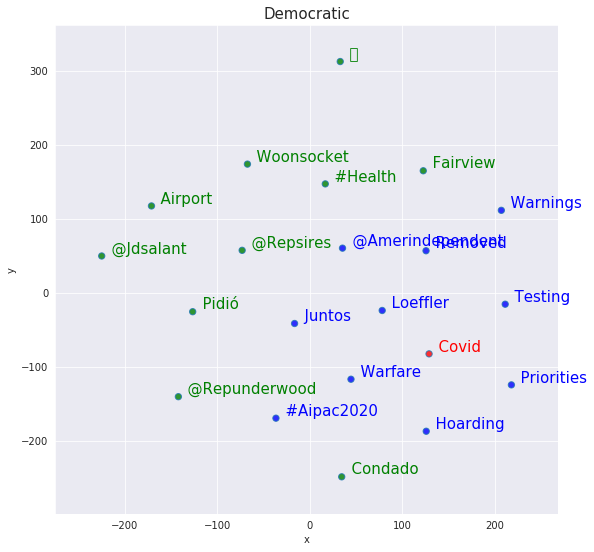

In [85]:
tsnescatterplot(dem_model, 'COVID', dem_random_words, 'Democratic')